In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('teste2_dados_2000.txt') as f:
    lines = f.readlines()

In [3]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[1], dtype=int, sep=' ')
    if dados_linha.size==600:
        dados_lst.append(dados_linha)
        freqs_linha = medida[0].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[1], dtype=float, sep=' '))
    else:
        print(medida[0].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

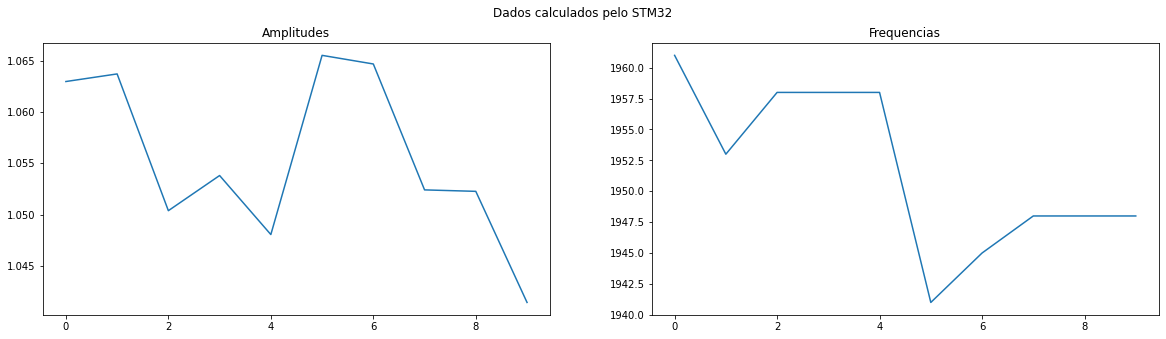

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [5]:
dados.shape

(10, 600)

In [6]:
linha = 1

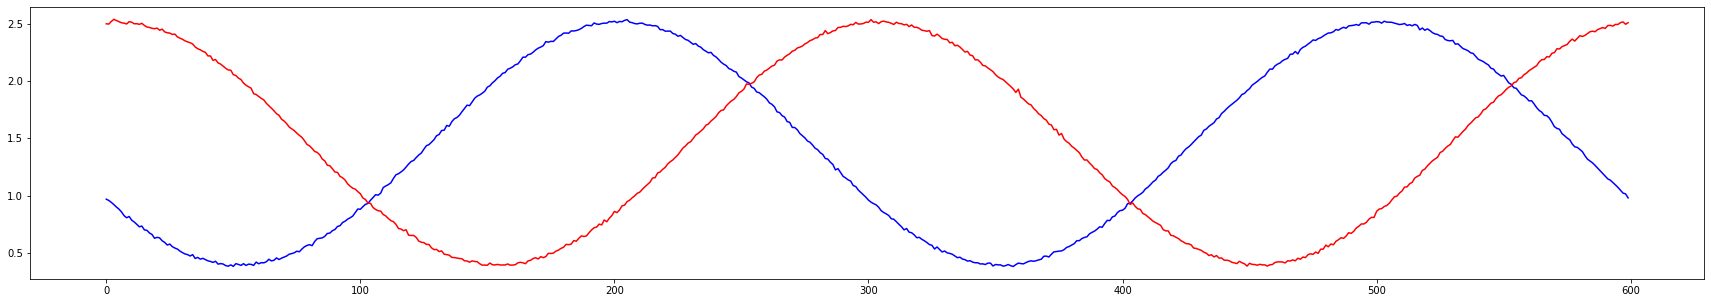

In [7]:
limite=600
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[linha,:limite]*k,'b-')
plt.plot(dados[9,:limite]*k,'r-')
plt.show()

In [8]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [9]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [10]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

df = 2000.0


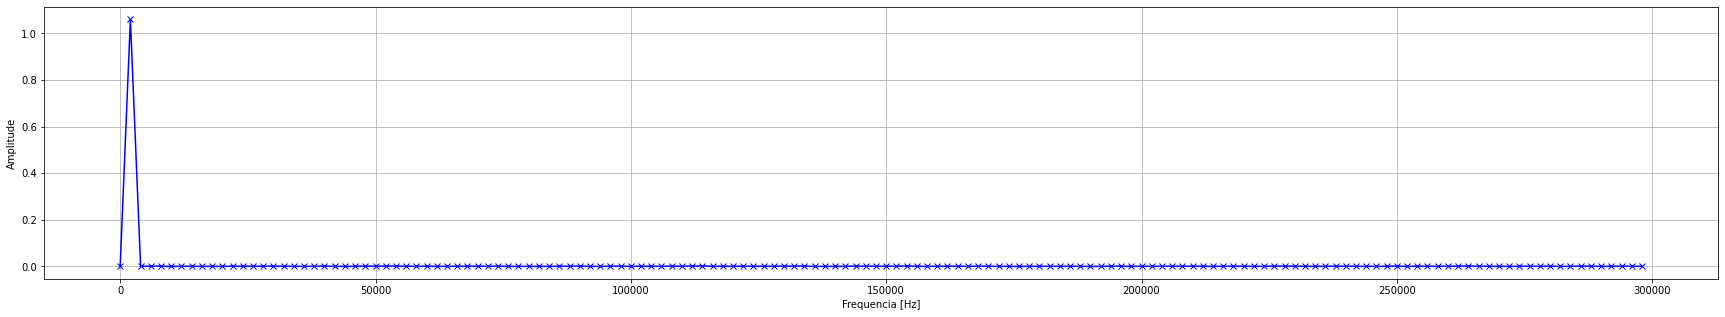

In [11]:
npontos = 300
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

df = 1000.0


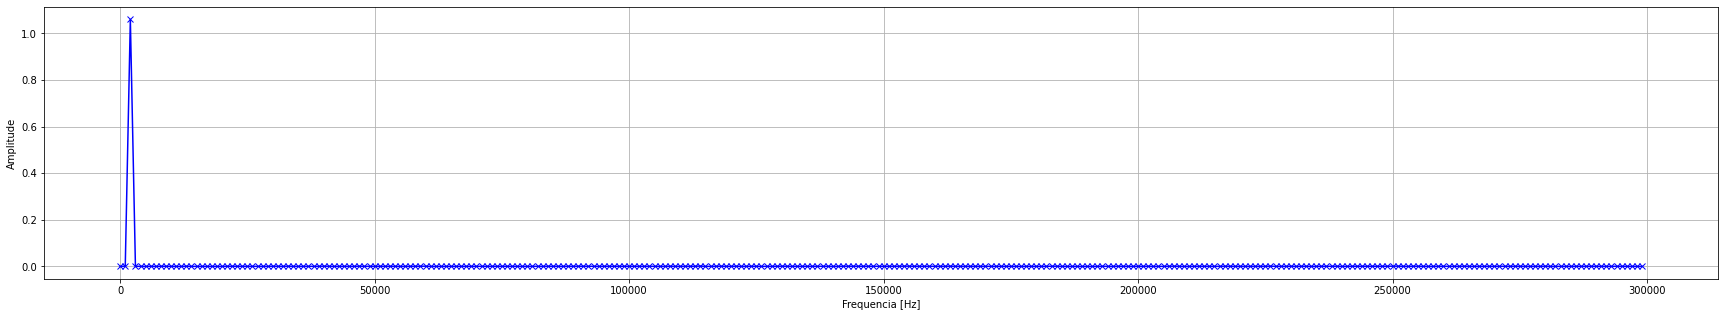

In [12]:
npontos = 600
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

In [13]:
frequencia = 2000
sample_freq = 600000
npontos_range = range(300,600,10)
componentes = [componente_precisa((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,
                                  frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

Text(0, 0.5, 'Componente em f=2000Hz')

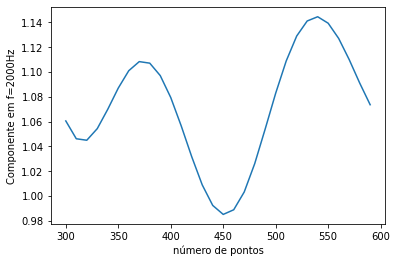

In [14]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [15]:
frequencia = 2000
sample_freq = 600000
npontos = 300
inicio_range = range(0,600-npontos-1,10)
componentes = [componente_precisa((dados[linha,inicio:inicio+npontos]-np.mean(dados[linha,inicio:inicio+npontos]))*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

Text(0, 0.5, 'Componente em f=2000Hz')

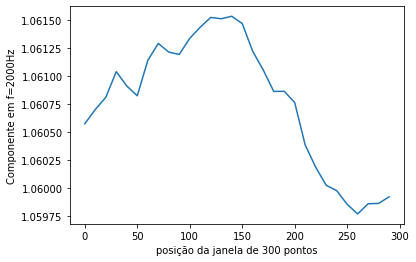

In [16]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [17]:
frequencia_range = range(1700,2100,1)
sample_freq = 600000
inicio_pontos = 0
npontos = 300
componentes = [componente_precisa((dados[linha,inicio_pontos:inicio_pontos+npontos]-
                                   np.mean(dados[linha,inicio_pontos:inicio_pontos+npontos]))*k,
                                  frequencia_i,sample_freq, fator_zeros=100000) 
               for frequencia_i in frequencia_range]

In [18]:
frequencia_range2 = range(1700,2100,1)
sample_freq = 600000
npontos2 = 600
componentes2 = [componente_precisa((dados[linha,:npontos2]-np.mean(dados[linha,:npontos2]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range2]

In [19]:
idx_pico = np.argmax(componentes)
print(idx_pico)

96


In [20]:
# olhando 300 pontos
for pontos in range(0,100,5):
    erro_perc = ((componentes[idx_pico]-componentes[idx_pico-pontos])/componentes[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 5Hz	Erro: 0.0009908024831228022%
dif freq: 10Hz	Erro: 0.0038207156003656705%
dif freq: 15Hz	Erro: 0.008491064721337725%
dif freq: 20Hz	Erro: 0.015003127793029716%
dif freq: 25Hz	Erro: 0.023358135343690797%
dif freq: 30Hz	Erro: 0.03355727048649906%
dif freq: 35Hz	Erro: 0.04560166892578915%
dif freq: 40Hz	Erro: 0.05949241896515627%
dif freq: 45Hz	Erro: 0.0752305615157666%
dif freq: 50Hz	Erro: 0.09281709010730699%
dif freq: 55Hz	Erro: 0.11225295089986274%
dif freq: 60Hz	Erro: 0.1335390426976926%
dif freq: 65Hz	Erro: 0.15667621696384887%
dif freq: 70Hz	Erro: 0.18166527783723138%
dif freq: 75Hz	Erro: 0.20850698215015637%
dif freq: 80Hz	Erro: 0.23720203944784354%
dif freq: 85Hz	Erro: 0.26775111200980023%
dif freq: 90Hz	Erro: 0.30015481487147333%
dif freq: 95Hz	Erro: 0.3344137158485824%


In [21]:
# olhando 600 pontos
idx_pico2 = np.argmax(componentes2)
for pontos in range(0,40,2):
    erro_perc = ((componentes2[idx_pico2]-componentes2[idx_pico2-pontos])/componentes[idx_pico2])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 2Hz	Erro: 0.0008934658565167299%
dif freq: 4Hz	Erro: 0.0030659949804812334%
dif freq: 6Hz	Erro: 0.006517977500876777%
dif freq: 8Hz	Erro: 0.011249775360749392%
dif freq: 10Hz	Erro: 0.01726172229975062%
dif freq: 12Hz	Erro: 0.024554123835847933%
dif freq: 14Hz	Erro: 0.03312725724990659%
dif freq: 16Hz	Erro: 0.042981371569522406%
dif freq: 18Hz	Erro: 0.05411668755399893%
dif freq: 20Hz	Erro: 0.06653339768044823%
dif freq: 22Hz	Erro: 0.08023166612943389%
dif freq: 24Hz	Erro: 0.09521162877281952%
dif freq: 26Hz	Erro: 0.1114733931613678%
dif freq: 28Hz	Erro: 0.12901703851356683%
dif freq: 30Hz	Erro: 0.1478426157041655%
dif freq: 32Hz	Erro: 0.1679501472548724%
dif freq: 34Hz	Erro: 0.1893396273248681%
dif freq: 36Hz	Erro: 0.212011021702149%
dif freq: 38Hz	Erro: 0.23596426779566235%


In [22]:
for idx,(c,f) in enumerate(zip(componentes,frequencia_range)):
    print(f'{idx}\t{c}\t{f}')

0	1.073106741097925	1700
1	1.073182917638233	1701
2	1.0732582948937455	1702
3	1.0733328729076805	1703
4	1.073406651724076	1704
5	1.073479631387778	1705
6	1.073551811944447	1706
7	1.0736231934405571	1707
8	1.0736937759233947	1708
9	1.0737635594410584	1709
10	1.0738325440424623	1710
11	1.0739007297773309	1711
12	1.0739681166962063	1712
13	1.0740347048504402	1713
14	1.0741004942922003	1714
15	1.0741654850744653	1715
16	1.0742296772510327	1716
17	1.0742930708765084	1717
18	1.0743556660063154	1718
19	1.0744174626966894	1719
20	1.0744784610046814	1720
21	1.0745386609881546	1721
22	1.0745980627057903	1722
23	1.074656666217079	1723
24	1.0747144715823298	1724
25	1.0747714788626623	1725
26	1.0748276881200154	1726
27	1.07488309941714	1727
28	1.074937712817601	1728
29	1.0749915283857796	1729
30	1.0750445461868694	1730
31	1.075096766286883	1731
32	1.0751481887526457	1732
33	1.0751988136517947	1733
34	1.07524864105279	1734
35	1.0752976710248976	1735
36	1.0753459036382058	1736
37	1.0753933389636154	1

In [23]:
for idx,(c,f) in enumerate(zip(componentes2,frequencia_range2)):
    print(f'{idx}\t{c}\t{f}')

0	0.9561073355131606	1700
1	0.9569379620925793	1701
2	0.9577656256155928	1702
3	0.958590322045524	1703
4	0.9594120473623906	1704
5	0.9602307975629177	1705
6	0.9610465686605711	1706
7	0.9618593566855718	1707
8	0.9626691576849178	1708
9	0.9634759677224143	1709
10	0.9642797828786879	1710
11	0.9650805992512101	1711
12	0.9658784129543223	1712
13	0.9666732201192549	1713
14	0.9674650168941509	1714
15	0.9682537994440807	1715
16	0.9690395639510752	1716
17	0.9698223066141403	1717
18	0.970602023649272	1718
19	0.971378711289492	1719
20	0.9721523657848556	1720
21	0.9729229834024797	1721
22	0.9736905604265631	1722
23	0.9744550931584032	1723
24	0.9752165779164181	1724
25	0.9759750110361723	1725
26	0.9767303888703888	1726
27	0.9774827077889728	1727
28	0.9782319641790366	1728
29	0.9789781544449119	1729
30	0.9797212750081712	1730
31	0.9804613223076529	1731
32	0.9811982927994795	1732
33	0.9819321829570669	1733
34	0.9826629892711582	1734
35	0.9833907082498382	1735
36	0.9841153364185459	1736
37	0.984836870

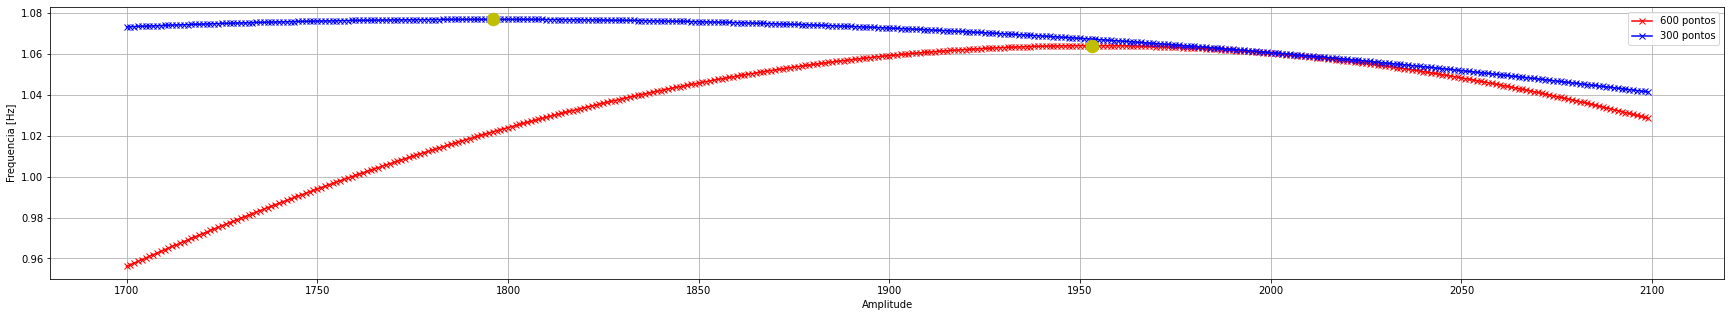

In [24]:
plt.figure(figsize=(30,5))
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')
plt.plot(frequencia_range2[idx_pico2], componentes2[idx_pico2], 'y.', markersize = 25)
plt.plot(frequencia_range[idx_pico], componentes[idx_pico], 'y.', markersize = 25)
plt.xlabel(f'Amplitude')
plt.ylabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

In [25]:
dados.shape[0]

10

In [26]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 300
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0736630332807184	1830	1.0736202371013637	1.0736630332807184	1.073627503745511
1	1.0767781170773507	1800	1.0767686519707311	1.0767781170773507	1.0767084776120581
2	1.0737956534291886	2170	1.073748395699989	1.0737956534291886	1.073747385150279
3	1.0625694770784904	2090	1.062564362519976	1.0625694770784904	1.0624880436649227
4	1.0822043325372854	2210	1.0821730343893017	1.0822043325372854	1.082134517266191
5	1.0858374316806712	1740	1.0857609550801555	1.0858374316806712	1.085832053875302
6	1.0824337093874654	1760	1.0823873053203452	1.0824337093874654	1.0823993356950203
7	1.0611383741283522	2060	1.0611222212469025	1.0611383741283522	1.0610704159269342
8	1.0618434660318063	2070	1.0618385089901194	1.0618434660318063	1.0617635445520406
9	1.0929785227141016	2250	1.0929471327011495	1.0929785227141016	1.0929020540737637


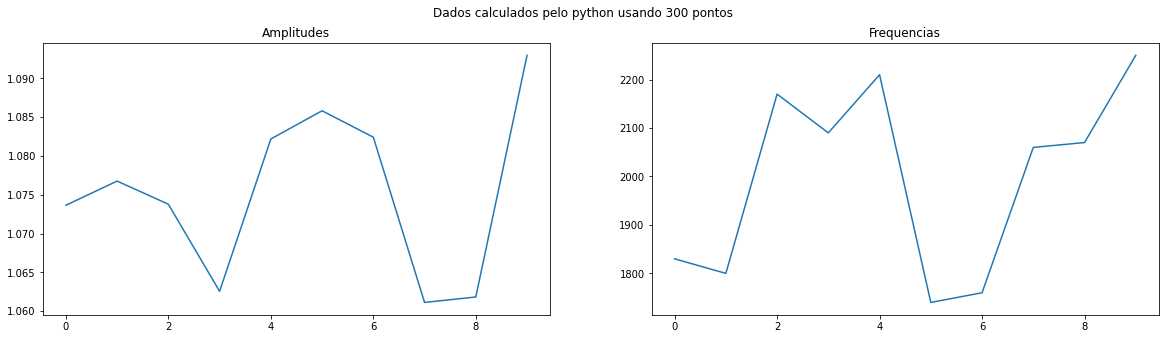

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos')
plt.show()

In [28]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0632199828344726	1960	1.0630007571494557	1.0632199828344726	1.0630988209454213
1	1.0639455818097412	1950	1.0636589369409033	1.0639455818097412	1.0638909503258742
2	1.063813609131325	2040	1.0634782287225626	1.063813609131325	1.0637920076158884
3	1.0609384187757305	2020	1.060728069045725	1.0609384187757305	1.0608011816290062
4	1.0657162097768502	2060	1.0656631893727824	1.0657162097768502	1.06540509364775
5	1.0657741576726762	1940	1.0655737896816029	1.0657741576726762	1.06563075352549
6	1.0648924990808002	1940	1.0645517534390891	1.0648924990808002	1.0648902628122567
7	1.0600947201611357	2010	1.0597882102864296	1.0600947201611357	1.0600562125621495
8	1.0603809645762399	2020	1.0603569618322837	1.0603809645762399	1.0600587399491392
9	1.0691711208660588	2070	1.0689675146714868	1.0691711208660588	1.0690019775991582


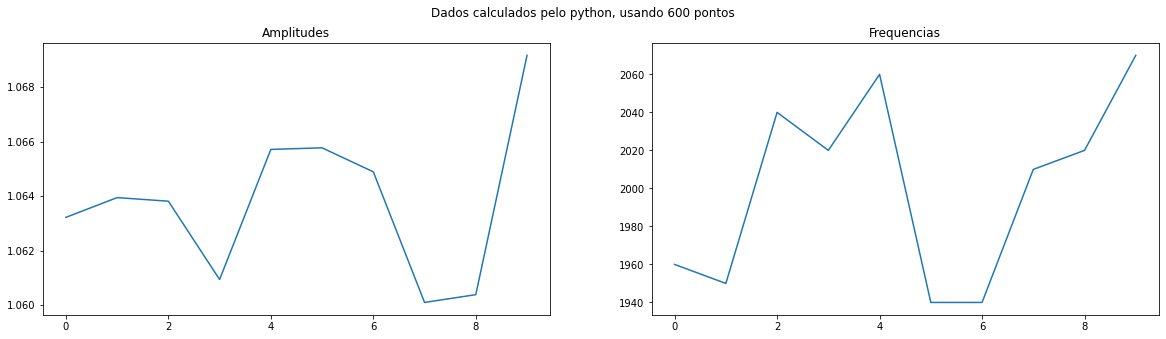

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 600 pontos')
plt.show()

In [30]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 300000
    componentes2 = [componente_precisa((dados[frame,:npontos2:2]-np.mean(dados[frame,:npontos2:2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.062851134819931	1960	1.0625869646901611	1.062851134819931	1.062775364524874
1	1.0646481700829205	1950	1.06440656226834	1.0646481700829205	1.0645481802581267
2	1.063555061209462	2040	1.063261252071284	1.063555061209462	1.0634924854432823
3	1.0608706703160662	2020	1.060710611559276	1.0608706703160662	1.0606837957764867
4	1.0650463308254148	2060	1.065037589787104	1.0650463308254148	1.064691699395525
5	1.0655231328340238	1940	1.0652827189096545	1.0655231328340238	1.0654198639679664
6	1.0651026836484094	1950	1.0650655495755816	1.0651026836484094	1.0647974537622291
7	1.0596483621934407	2020	1.0596416867569032	1.0596483621934407	1.0593093857841491
8	1.0614654507541375	2020	1.061393251655793	1.0614654507541375	1.0611904953745919
9	1.0676407686715885	2070	1.0674462255557848	1.0676407686715885	1.0674631750408672


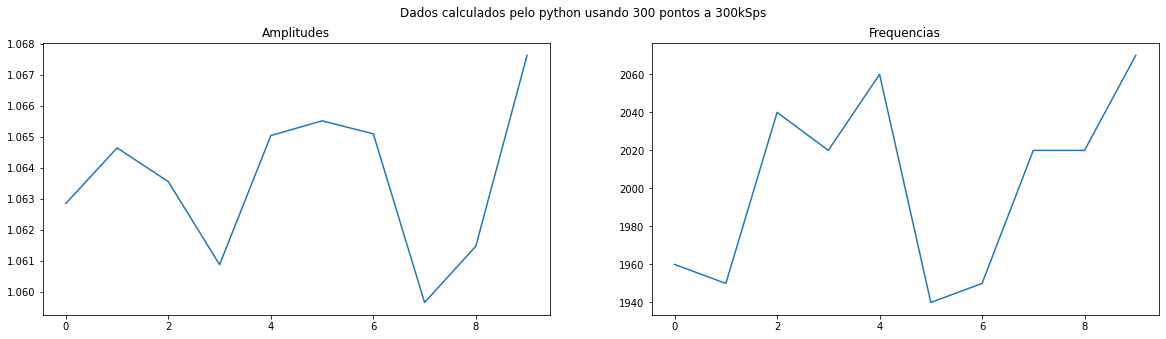

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos a 300kSps')
plt.show()

In [32]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
downsampling = 5
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000/downsampling
    componentes2 = [componente_precisa((dados[frame,:npontos2:downsampling]-np.mean(dados[frame,:npontos2:downsampling]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.063861466517301	1970	1.0637859270617294	1.063861466517301	1.0635972058544314
1	1.0656910609101216	1950	1.0655881596620769	1.0656910609101216	1.0654514146667937
2	1.0616761028347923	2040	1.0615158169323577	1.0616761028347923	1.0614821706614033
3	1.0602924214896936	2010	1.0599510066703168	1.0602924214896936	1.060288585306688
4	1.0643947406437533	2050	1.0641148811260208	1.0643947406437533	1.064313248935311
5	1.0666238467807159	1950	1.066602185560058	1.0666238467807159	1.066302333769293
6	1.064534758786601	1950	1.0643918505897965	1.064534758786601	1.0643359418476996
7	1.0594159799208678	2020	1.0592374031754221	1.0594159799208678	1.0592481453725588
8	1.06050230986288	2020	1.0602774379405184	1.06050230986288	1.0603791524913722
9	1.0681842777125212	2070	1.0680132328283996	1.0681842777125212	1.067983519823105


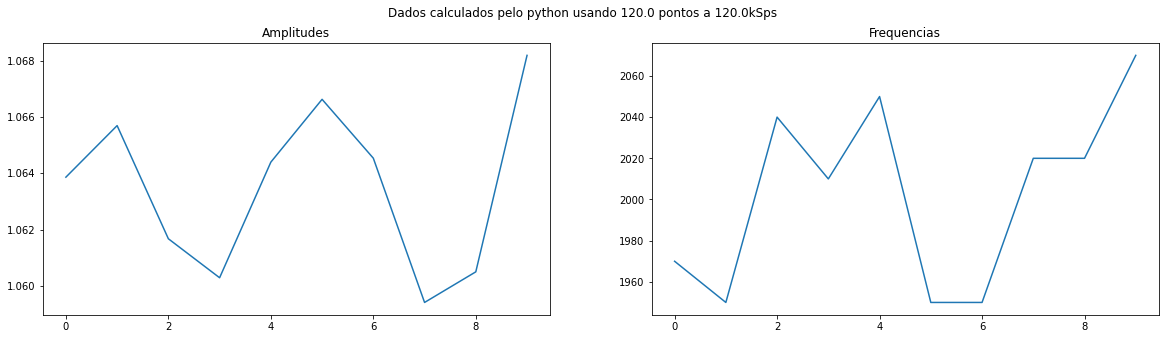

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
freq_usada = sample_freq/1000
npontos_usado = npontos2/downsampling
plt.suptitle(f'Dados calculados pelo python usando {npontos_usado} pontos a {freq_usada}kSps')
plt.show()

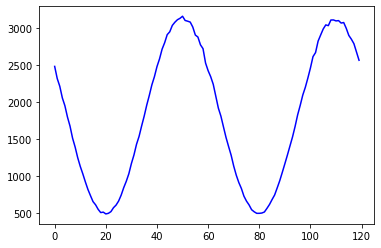

In [34]:
plt.plot(dados[0,:600:downsampling],'b') # amostrado a 300kSps

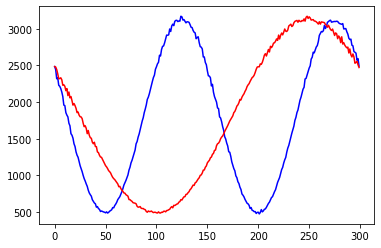

In [35]:
plt.plot(dados[0,:600:2],'b') # amostrado a 300kSps
plt.plot(dados[0,:300],'r') # amostrado a 600kSps